![](logo.png)
## Day Objectives
# Decision Tree
- Decision tree is the most powerful and popular tool for classification and prediction
- A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process.
- A Decision tree is a flowchart like tree structure
- Used  in **data mining** for deriving a strategy to reach a particular goal, its also widely used in machine learning

**Types of Algorithms**
    - CART  - classification and regression algorithm
        - gini index/ gini impurity
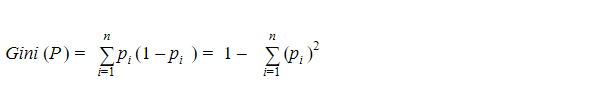
    - ID3  - iterative dechomister 3  
            - Information gain
            - log function / std deviation

**Types of Decision Trees**
 Types of decision trees are based on the type of target variable we have. It can be of two types:

- **Categorical Variable Decision Tree**: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
- **Continuous Variable Decision Tree**: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

#### Important Terminology related to Decision Trees


- **Root Node**: It represents the entire sample and this further gets divided into two or more homogeneous sets.
- **Splitting**: It is a process of dividing a node into two or more sub-nodes.

- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.

- **Leaf / Terminal Node**: Nodes do not split is called Leaf or Terminal node.
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

- **Branch / Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.

- **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.



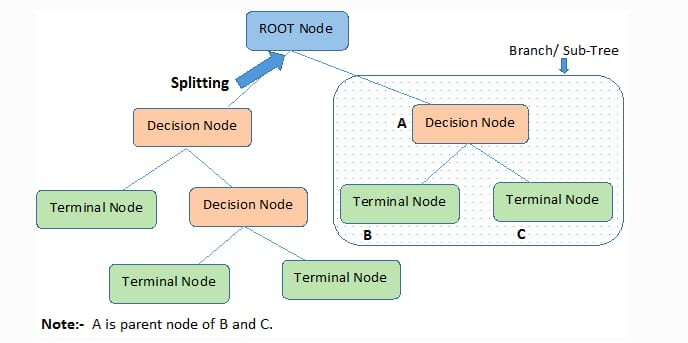
**Advantages**:
    - Simple to understand, interpret, visualize.
    - Decision trees implicitly perform variable screening or feature selection.
    - Can handle both numerical and categorical data. Can also handle multi-output problems.
    - Nonlinear relationships between parameters do not affect tree performance.
**DisAdvantage**:
    - OverFitting Problem
    

# Decision Tree as a Classifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
data = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/diabetes.csv")
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [159]:
data.shape

(768, 9)

In [160]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [161]:
data["Age"].max()

81

In [162]:
data["Age"].min()

21

In [163]:
data.shape[1]

9

In [164]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [165]:
data.duplicated().sum()

0

In [166]:
X = data.drop("Outcome", axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [167]:
y = data["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [170]:
X_train.shape

(537, 8)

In [171]:
768-537

231

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
dcls = DecisionTreeClassifier(max_depth = 3, criterion="entropy")

In [174]:
help(dcls)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [175]:
dcls

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [176]:
dcls.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [177]:
pred_values = dcls.predict(X_test)

In [178]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [179]:
accuracy_score(y_test,pred_values)* 100

73.16017316017316

In [180]:
confusion_matrix(y_test,pred_values) # evaluting model preformance

array([[145,  12],
       [ 50,  24]], dtype=int64)

In [181]:
print(pred_values.sum())
pred_values

36


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [182]:
y_test.shape

(231,)

In [183]:
144+13+50+24

231

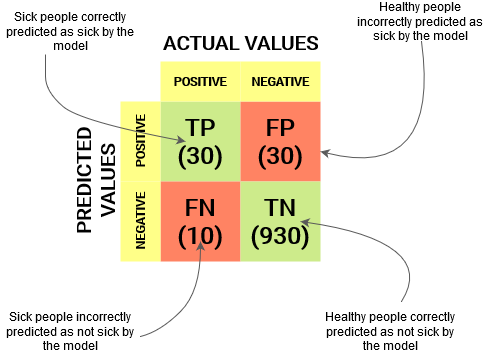

In [184]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [185]:
X = data[["Glucose","BMI"]]

In [186]:
y = data["Outcome"]

In [187]:
from sklearn import tree

In [188]:
X_train.shape

(537, 8)

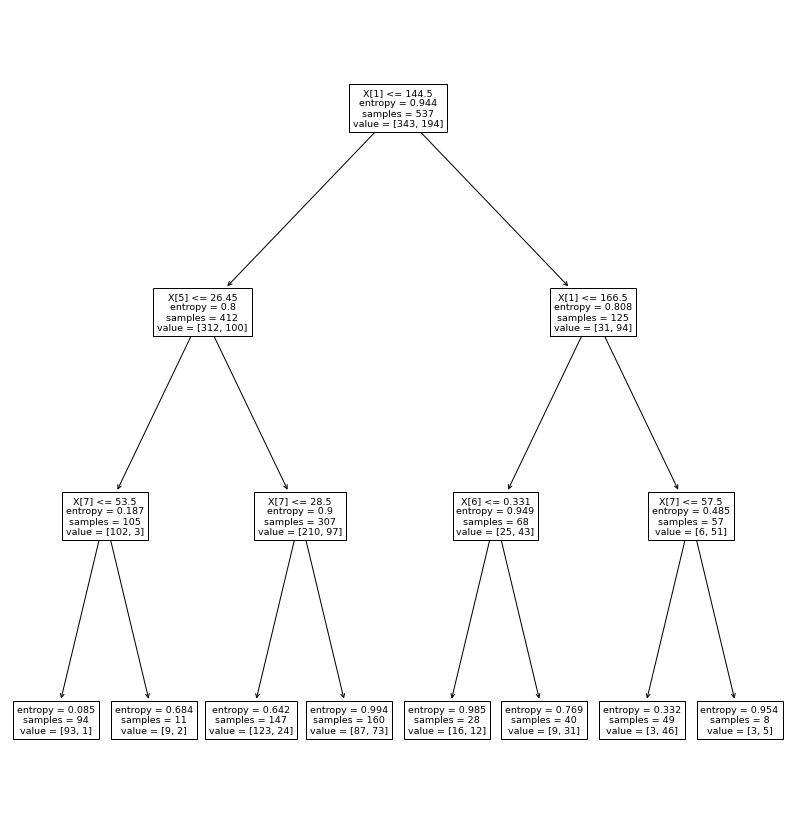

In [189]:
plt.figure(figsize = (14,15))
tree.plot_tree(dcls)
plt.show()

In [198]:
v = list(X_train.iloc[55])

In [201]:
y_train.iloc[55]

0

In [202]:
dcls.predict([v])

array([0], dtype=int64)

In [203]:
dcls.predict_proba([v])

array([[0.9893617, 0.0106383]])

**GINI** : Measuring Impurities level
    - try to reduce gini index value
**Information Gain** : 1 - Entropy
    - it holds maximum information 
    - try to increase information gain


# Decision Tree as regressor

In [103]:
auto_data = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/automobiles.csv")

In [104]:
auto_data.head()

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,height,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,front,171.2,65.5,52.4,six,154,5000,19,26,16500
3,audi,gas,four,sedan,front,176.6,66.2,54.3,four,102,5500,24,30,13950
4,audi,gas,four,sedan,front,176.6,66.4,54.3,five,115,5500,18,22,17450


In [105]:
auto_data.shape

(201, 14)

In [106]:
auto_data.isnull().sum()

make                0
fuel-type           0
num-of-doors        0
body-style          0
engine-location     0
length              0
width               0
height              0
num-of-cylinders    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [125]:
auto_data.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'engine-location',
       'length', 'width', 'height', 'num-of-cylinders', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [126]:
auto_data.corr()

,length,width,height,city-mpg,highway-mpg,price
length,1.000000,0.857170,0.492063,-0.665192,-0.698142,0.690628
width,0.857170,1.000000,0.306002,-0.633531,-0.680635,0.751265
height,0.492063,0.306002,1.000000,-0.049800,-0.104812,0.135486
city-mpg,-0.665192,-0.633531,-0.049800,1.000000,0.972044,-0.686571
highway-mpg,-0.698142,-0.680635,-0.104812,0.972044,1.000000,-0.704692
price,0.690628,0.751265,0.135486,-0.686571,-0.704692,1.000000


In [127]:

X = auto_data[["length", "height", "width"]]
X
y = auto_data["price"]

In [128]:
auto_data.duplicated() 

0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 201, dtype: bool

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
dreg = DecisionTreeRegressor(max_depth=3)

In [146]:
dreg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [147]:
pred = dreg.predict(X_test)

In [148]:
from sklearn.metrics import r2_score, mean_squared_error

In [149]:
r2_score(y_test,pred)* 100

58.2795817350414

In [152]:
mean_squared_error(y_test,pred)

27683848.04492265

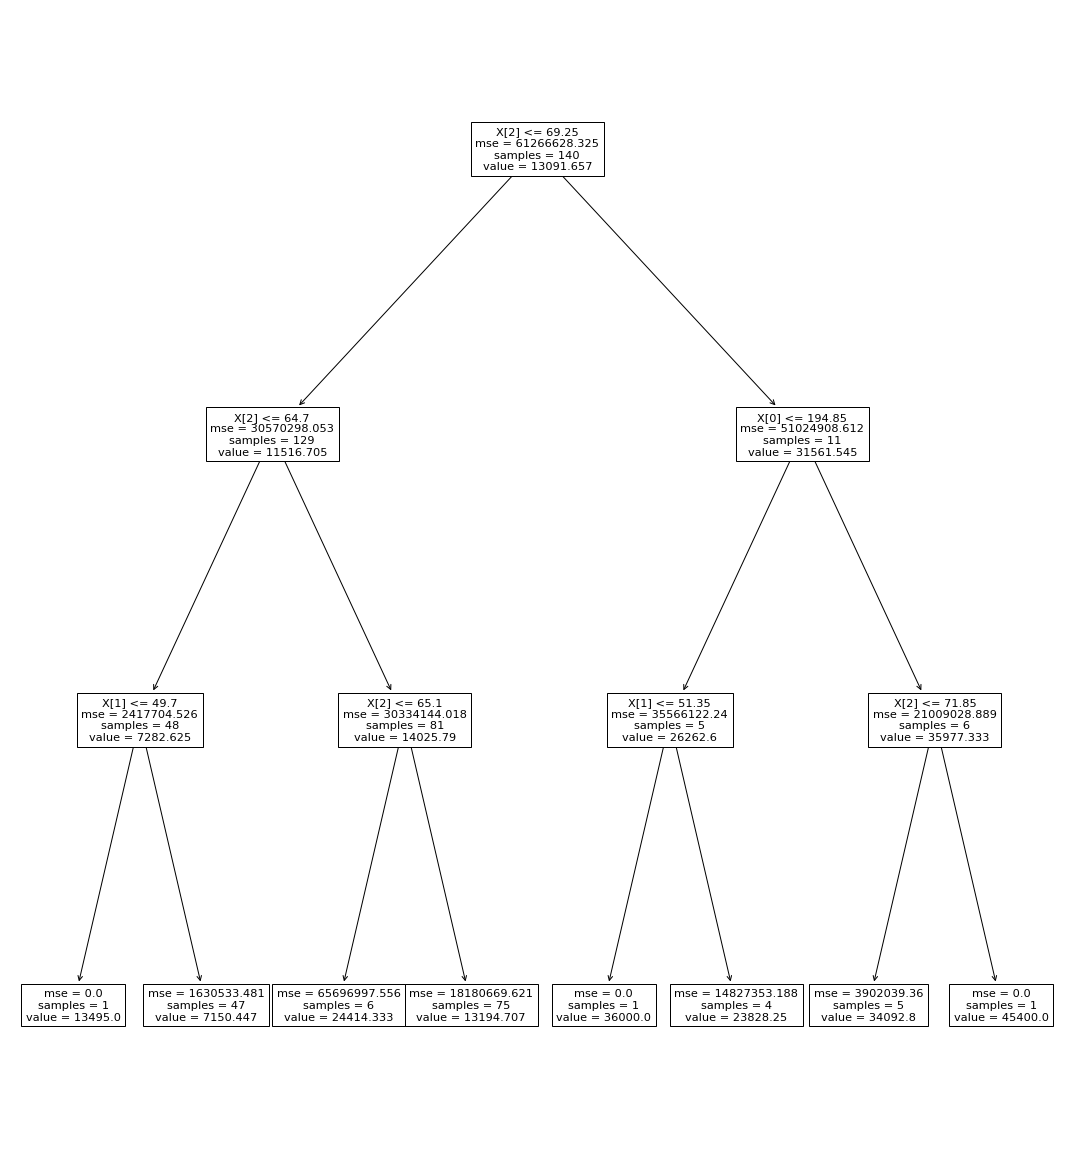

In [151]:
plt.figure(figsize = (19,21))
tree.plot_tree(dreg)
plt.show()

In [153]:
X_test.iloc[27]

length    186.6
height     56.1
width      66.5
Name: 133, dtype: float64

In [155]:
dreg.predict([[186.6,56.1,66.5]])

array([13194.70666667])

In [156]:
dreg.predict([[170,68,62]])

array([7150.44680851])